In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas.tools import geocode
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from shapely.geometry import Point
import contextily as ctx
import matplotlib.pyplot as plt
import folium.plugins 
from folium.plugins import HeatMap 
import branca.colormap
from fuzzywuzzy import fuzz
from unidecode import unidecode
import json
import requests

C:\Users\conta\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Carregando os dados

In [41]:
df0 = pd.read_csv('..\Ambiente\csv\svsaweb_csv-2023-26-10.csv')
unidades = pd.read_csv(r'..\Ambiente\csv\unidadenomecodigo-svsaweb_csv-2023-13-09.csv')
limites_bairros=gpd.read_file(r'..\Ambiente\shp\mapa-salto-bairros\bairros-salto.shp')

In [4]:
df0

,endereco,numero,bairro,sexo,situacao,codigo,nome
0,Melvin Jones,966,Santo Inacio,FEMININO,NaN,3,CRAS Jardim Independência
1,Melvin Jones,966,Santo Inacio,MASCULINO,NaN,3,CRAS Jardim Independência
2,Melvin Jones,966,Santo Inacio,MASCULINO,NaN,3,CRAS Jardim Independência
3,Melvin Jones,966,Santo Inacio,MASCULINO,NaN,3,CRAS Jardim Independência
4,Rua Margarida,160,Independência,FEMININO,NaN,3,CRAS Jardim Independência
...,...,...,...,...,...,...,...
995,Rua Margarida,14,Jdindependencia,MASCULINO,NaN,3,CRAS Jardim Independência
996,Rua Margarida,14,Jdindependencia,FEMININO,NaN,3,CRAS Jardim Independência
997,Rua Margarida,14,Jdindependencia,FEMININO,NaN,3,CRAS Jardim Independência
998,Rua Margarida,14,Jdindependencia,FEMININO,NaN,3,CRAS Jardim Independência


In [42]:
limites_bairros = limites_bairros[['Name','geometry']]
limites_bairros

,Name,geometry
0,Jardim Nova Era,"POLYGON Z ((-47.31189 -23.18239 554.41968, -47..."
1,Jardim Sao Judas Tadeu,"POLYGON Z ((-47.31144 -23.18086 550.68628, -47..."
2,Jardim Bom Retiro,"POLYGON Z ((-47.30731 -23.17713 542.26219, -47..."
3,Vila Norma,"POLYGON Z ((-47.31218 -23.18611 558.19332, -47..."
4,Jardim Sao Joao,"POLYGON Z ((-47.31180 -23.17887 539.56696, -47..."
5,Santa Edwirges,"POLYGON Z ((-47.31174 -23.17408 511.05444, -47..."
6,Jardim Alvorada,"POLYGON Z ((-47.30823 -23.17538 529.77011, -47..."
7,Res Sao Gabriel,"POLYGON Z ((-47.30367 -23.17494 533.43792, -47..."
8,Res Sao Gabriel ll,"POLYGON Z ((-47.30208 -23.17741 551.22208, -47..."
9,Jardim Uniao,"POLYGON Z ((-47.32098 -23.17578 516.22788, -47..."


In [55]:
bairros=gpd.GeoDataFrame()
bairros['bairro']= limites_bairros['Name'].str.strip().str.lower()
bairros['geometry'] = limites_bairros['geometry']

C:\Users\conta\AppData\Local\Temp\ipykernel_14400\2463694619.py:3: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  bairros['geometry'] = limites_bairros['geometry']


In [51]:
unidades.head(15)

,nome,codigo
0,Unidade para Testes,1
1,CRAS Jardim Santa Cruz,2
2,CRAS Jardim Independência,3
3,CRAS Jardim das Nações,4
4,CRAS Jardim Saltense,5
5,CRAS Salto de São José,6
6,CREAS,7
7,SASC Desativado,8
8,SASC,9
9,Espaço POP,10


## Tratamento

In [58]:
df = df0.merge(unidades, on='codigo')
df.drop(columns='nome_x', inplace= True)
df.rename(columns={'nome_y':'unidade'}, inplace=True)
df.head(15)

,endereco,numero,bairro,sexo,situacao,codigo,unidade
0,Melvin Jones,966,Santo Inacio,FEMININO,NaN,3,CRAS Jardim Independência
1,Melvin Jones,966,Santo Inacio,MASCULINO,NaN,3,CRAS Jardim Independência
2,Melvin Jones,966,Santo Inacio,MASCULINO,NaN,3,CRAS Jardim Independência
3,Melvin Jones,966,Santo Inacio,MASCULINO,NaN,3,CRAS Jardim Independência
4,Rua Margarida,160,Independência,FEMININO,NaN,3,CRAS Jardim Independência
5,Rua Margarida,160,Independência,FEMININO,NaN,3,CRAS Jardim Independência
6,Rua Margarida,160,Independência,MASCULINO,NaN,3,CRAS Jardim Independência
7,Rua Margarida,160,Independência,MASCULINO,NaN,3,CRAS Jardim Independência
8,Rua Margarida,94,Jardim Independência,FEMININO,NaN,3,CRAS Jardim Independência
9,Rua Margarida,94,Jardim Independência,MASCULINO,NaN,3,CRAS Jardim Independência


### Tratando registros sem número/endereço

In [59]:
df[(df['numero'] == 0) | (df['numero'].isnull())]

,endereco,numero,bairro,sexo,situacao,codigo,unidade
341,"Rua Anturios, S/N",0,Independência,FEMININO,NaN,3,CRAS Jardim Independência
581,Não Tem Endereço,0,???,FEMININO,NaN,3,CRAS Jardim Independência
674,Não Tem Endereço,0,???,FEMININO,NaN,3,CRAS Jardim Independência
682,Rodovia Santos Dumont Km43,0,Lageado,FEMININO,NaN,3,CRAS Jardim Independência
721,"Estrada Do Lageado, (Sem Numero)",0,Estrada Do Lageado,FEMININO,NaN,3,CRAS Jardim Independência
747,Rua 9 De Julho 2240,0,Centro,FEMININO,NaN,3,CRAS Jardim Independência
791,Rua 24 De Outubro 1322,0,Vila Henrique,NaN,NaN,3,CRAS Jardim Independência
823,Rua Presidente Geisiel,0,Santo Antonio,FEMININO,NaN,3,CRAS Jardim Independência
824,Rua Presidente Geisiel,0,Santo Antonio,MASCULINO,NaN,3,CRAS Jardim Independência
825,Rua Presidente Geisiel,0,Santo Antonio,FEMININO,NaN,3,CRAS Jardim Independência


In [60]:
#Removendo as linhas sem endereco/bairro ou sem numero; 
# Rua Presidente Geisiel 0?
# Rodovia Santos Dumont?
df.drop(index=[341, 581, 674, 682, 721, 917, 937], inplace = True)
#Passando os numeros para a coluna correta

df.loc[747, 'endereco'] = "Rua 9 De Julho"
df.loc[747, 'numero'] = 2240

df.loc[791, 'endereco'] = "Rua 24 De Outubro"
df.loc[791, 'numero'] = 1322

df.loc[898, 'endereco'] = "Rua Anacleto Cruz"
df.loc[898, 'numero'] = 149

In [61]:
df[df['numero']==0]

,endereco,numero,bairro,sexo,situacao,codigo,unidade
823,Rua Presidente Geisiel,0,Santo Antonio,FEMININO,NaN,3,CRAS Jardim Independência
824,Rua Presidente Geisiel,0,Santo Antonio,MASCULINO,NaN,3,CRAS Jardim Independência
825,Rua Presidente Geisiel,0,Santo Antonio,FEMININO,NaN,3,CRAS Jardim Independência
826,Rua Presidente Geisiel,0,Santo Antonio,MASCULINO,NaN,3,CRAS Jardim Independência
827,Rua Presidente Geisiel,0,Santo Antonio,MASCULINO,NaN,3,CRAS Jardim Independência


### Tratando registros sem bairro

In [62]:
df[df['bairro'].isna()]

,endereco,numero,bairro,sexo,situacao,codigo,unidade


Como não existem valores em branco na coluna 'bairro', não é necessário prosseguir com o tratamento.

### Tratando os nomes dos bairros
- Necessário, pois existem registros de bairros em "df" que não existem em "bairros".
- Não será necessário para o HeatMap, mas para o mapa coroplético.
- Existem ocorrências de bairros, em 'df', que tomam dois limites dos bairros em 'bairros'. É necessário, portanto, verificar se o endereço esclarece a qual bairro, dentro dos limites estabelecidos, a vítima pertence. Para facilitar a busca e correção, é apropriado uniformizar os campos, removendo acentos, etc.

In [76]:
df['bairro']=df['bairro'].apply(unidecode)
df['endereco']=df['endereco'].apply(unidecode)
df['bairro']=df['bairro'].str.strip().str.lower()

#### Verificando os valores únicos

In [77]:
print("Bairros que aparecem no dataframe 'df':", df['bairro'].unique())

Bairros que aparecem no dataframe 'df': ['santo inacio' 'independencia' 'jardim independencia'
 'loteamento alberto cintra filho' 'jardim santa lucia' 'vila progresso'
 'jardim donalisio' 'santa lucia' 'bela vista' 'jardim santo inacio'
 'vila roma' 'residencial porto seguro' 'centro' 'jardim santo antonio'
 'jardim europa' 'vila flora' 'vila teixeira' 'jardim primavera'
 'donalisio' 'jd.santo inacio' 'jd.independencia' 'porto seguro'
 'jd.santo antonio' 'vila henrique' 'vila nova' 'estrada do lageado'
 'jd.santa lucia' 'jd.independencia ii' 'santo antonio'
 'bela vista (fundos)' 'jardimdonalisio' 'jdindependencia' 'jd. europa'
 'isaura maria' 'parque gloria' 'jardim maria jose' 'lageado' 'vila romao'
 'jd europa' 'jd porto seguro' 'jardim arco-iris' 'jardim santa cruz'
 'jardim marilia' 'jardim das nacoes' 'jardim nair maria'
 'jardim panorama' 'jardim planalto' 'jardim sao judas tadeu'
 'jardim saltense' 'jardim sao gabriel' 'jardim tres marias'
 'jardim sao joao' 'jd. maria jose']


In [78]:
print("Bairros que aparecem no dataframe 'bairros':", bairros['bairro'].unique())

Bairros que aparecem no dataframe 'bairros': ['jardim nova era' 'jardim sao judas tadeu' 'jardim bom retiro'
 'vila norma' 'jardim sao joao' 'santa edwirges' 'jardim alvorada'
 'res sao gabriel' 'res sao gabriel ll' 'jardim uniao' 'jardim saltense'
 "jardim d'icarai" 'res fabri' 'jardim celani' 'lot ilha de capri'
 'terras de santa rosa' 'haras paineiras' 'estância da colina' 'buru'
 'piccolo paese' 'terras de mont serrat' 'chacara marajas'
 'zuleika jabour' 'jardim arquidiocesano' 'chacara iracema'
 'haras sao luiz' 'haras sao luiz ll' 'chacara halter'
 'distrito industrial' 'salto de sao jose' 'jardim elizabeth'
 'vila sao francisco' 'jardim santa rita' 'jardim itaguacu'
 'jardim santa efigenia' 'condominio monte belo' 'jardim santa cruz'
 'salto ville' 'parque res rondon' 'res santo stefano'
 'terras de sao pedro e sao paulo' 'jardim tres marias' 'vila teixeira'
 'centro' 'estacao' 'jardim marilia' 'jardim da cidade iv'
 'jardim da cidade i' 'jardim da cidade ii' 'vila nova'
 'jardi

In [79]:
#Bairros que aparecem em "df", mas não em "bairro". Devem ser tratados.
print(np.setdiff1d(df['bairro'].unique(), bairros['bairro'].unique()))

['bela vista (fundos)' 'donalisio' 'estrada do lageado' 'independencia'
 'isaura maria' 'jardim arco-iris' 'jardim panorama' 'jardim primavera'
 'jardim santa lucia' 'jardim santo inacio' 'jardim sao gabriel'
 'jardimdonalisio' 'jd europa' 'jd porto seguro' 'jd. europa'
 'jd. maria jose' 'jd.independencia' 'jd.independencia ii'
 'jd.santa lucia' 'jd.santo antonio' 'jd.santo inacio' 'jdindependencia'
 'lageado' 'loteamento alberto cintra filho' 'parque gloria'
 'porto seguro' 'residencial porto seguro' 'santa lucia' 'santo antonio'
 'santo inacio' 'vila henrique' 'vila romao']


#### Correções ortográficas

In [88]:
correcoes = {
    'bela vista (fundos)': 'bela vista',
    'donalisio': 'jardim donalisio',
    'jardimdonalisio': 'jardim donalisio',
    'independencia': 'jardim independencia',
    'jd.independencia': 'jardim independencia',
    'jd.independencia ii': 'jardim independencia',
    'jdindependencia': 'jardim independencia',
    'jd europa': 'jardim europa',
    'jd. europa': 'jardim europa',
    'jd. maria jose': 'jardim maria jose',
    'jd.santo antonio': 'jardim santo antonio',
    'santo antonio': 'jardim santo antonio',
    'vila romao':'vila roma'    
}

df['bairro'].replace(correcoes, inplace = True)

In [86]:
#Ainda devem ser tratados:
print(np.setdiff1d(df['bairro'].unique(), bairros['bairro'].unique()))

['estrada do lageado' 'isaura maria' 'jardim arco-iris' 'jardim panorama'
 'jardim primavera' 'jardim santa lucia' 'jardim santo inacio'
 'jardim sao gabriel' 'jd porto seguro' 'jd.santa lucia' 'jd.santo inacio'
 'lageado' 'loteamento alberto cintra filho' 'parque gloria'
 'porto seguro' 'residencial porto seguro' 'santa lucia' 'santo inacio'
 'vila henrique']


#### Verificação de bairros sem registro em 'bairros' ou com registro pouco esclarecedor

##### Lotamento Alberto Cintra Filho

In [67]:
pd.set_option('display.max_rows', None)
df[df['bairro'].str.contains('Cintra', case=False)]

,endereco,numero,bairro,sexo,situacao,codigo,unidade
13,Rua J. Silvestre,52,Loteamento Alberto Cintra Filho,FEMININO,NaN,3,CRAS Jardim Independência
14,Rua J. Silvestre,52,Loteamento Alberto Cintra Filho,FEMININO,NaN,3,CRAS Jardim Independência
15,Rua J. Silvestre,52,Loteamento Alberto Cintra Filho,MASCULINO,NaN,3,CRAS Jardim Independência
16,Rua J. Silvestre,52,Loteamento Alberto Cintra Filho,FEMININO,NaN,3,CRAS Jardim Independência
218,Rua Anselmo Duarte,236,Loteamento Alberto Cintra Filho,FEMININO,NaN,3,CRAS Jardim Independência
553,Rua Maestro Gao,34,Loteamento Alberto Cintra Filho,FEMININO,NaN,3,CRAS Jardim Independência
554,Rua Maestro Gao,34,Loteamento Alberto Cintra Filho,MASCULINO,NaN,3,CRAS Jardim Independência


In [18]:
# Rua J. Silvestre -> Jardim Santo Antonio
# Rua Anselmo Duarte, 236 -> Jardim Santo Antonio
# Rua Maestro Gao -> Jardim Santo Antonio
df.loc[[13,14,15,16,218,553,554],'bairro']='Jardim Santo Antonio'
df.loc[[13,14,15,16,218,553,554]]

,endereco,numero,bairro,sexo,situacao,codigo,unidade
13,Rua J. Silvestre,52,Jardim Santo Antonio,FEMININO,NaN,3,CRAS Jardim Independência
14,Rua J. Silvestre,52,Jardim Santo Antonio,FEMININO,NaN,3,CRAS Jardim Independência
15,Rua J. Silvestre,52,Jardim Santo Antonio,MASCULINO,NaN,3,CRAS Jardim Independência
16,Rua J. Silvestre,52,Jardim Santo Antonio,FEMININO,NaN,3,CRAS Jardim Independência
218,Rua Anselmo Duarte,236,Jardim Santo Antonio,FEMININO,NaN,3,CRAS Jardim Independência
553,Rua Maestro Gao,34,Jardim Santo Antonio,FEMININO,NaN,3,CRAS Jardim Independência
554,Rua Maestro Gao,34,Jardim Santo Antonio,MASCULINO,NaN,3,CRAS Jardim Independência


##### Jardim Santa Lucia

In [19]:
#Jardim Santa Lúcia/ Santa Lúcia/ Jd. Santa Lucia/ Jardim Santa Lúcia\xa0/ santa lucia/ 
pd.set_option('display.max_rows', None)
df[df['bairro'].str.contains('Lucia',case=False)]

,endereco,numero,bairro,sexo,situacao,codigo,unidade
17,Rua Egidio Bianchi,127,Jardim Santa Lucia,FEMININO,NaN,3,CRAS Jardim Independência
18,Rua Egidio Bianchi,127,Jardim Santa Lucia,MASCULINO,NaN,3,CRAS Jardim Independência
32,Rua 7 Setembro,70,Santa Lucia,FEMININO,NaN,3,CRAS Jardim Independência
33,Rua 7 Setembro,70,Santa Lucia,FEMININO,NaN,3,CRAS Jardim Independência
91,Rua Uirapuru,176,Jardim Santa Lucia,FEMININO,NaN,3,CRAS Jardim Independência
95,Rua Domingos Piotto,92,Jardim Santa Lucia,FEMININO,NaN,3,CRAS Jardim Independência
137,Rua Colibri,97,Jardim Santa Lucia,FEMININO,NaN,3,CRAS Jardim Independência
138,Rua Colibri,97,Jardim Santa Lucia,FEMININO,NaN,3,CRAS Jardim Independência
139,Rua Colibri,97,Jardim Santa Lucia,FEMININO,NaN,3,CRAS Jardim Independência
140,Rua Colibri,97,Jardim Santa Lucia,FEMININO,NaN,3,CRAS Jardim Independência


In [20]:
#Checagem dos numeros por nome da rua:
# Substituir a string dentro de contains() para fazer a verificação
# Exemplo. df[df['endereco'].str.contains('Melvin', case=False)]['numero'].unique() para mostrar os numeros das casas na Rua Melvin Jones.
print(list(df[df['endereco'].str.contains('lourdes', case=False)]['numero'].unique()))

[371, 99, 323, 63, 270, 206, 120, 159, 246]


In [21]:
#Todos os registros que possuem a string especificada dentro de contains():
# Exemplo. df[df['endereco'].str.contains('Melvin', case=False)] mostra todas as linhas onde o endereco possui a string "Melvin".
pd.set_option('display.max_rows', None)
df[df['endereco'].str.contains('lourdes', case=False)]

,endereco,numero,bairro,sexo,situacao,codigo,unidade
125,Rua Maria De Lourdes Guarda,371,Jardim Donalisio,FEMININO,NaN,3,CRAS Jardim Independência
126,Rua Maria De Lourdes Guarda,371,Jardim Donalisio,MASCULINO,NaN,3,CRAS Jardim Independência
247,Rua Maria De Lourdes Guarda,99,Jardim Donalisio,FEMININO,NaN,3,CRAS Jardim Independência
343,Rua Maria De Lourdes Guarda,323,Donalisio,FEMININO,NaN,3,CRAS Jardim Independência
466,Rua Maria De Lourdes Guarda,63,Santa Lucia,FEMININO,NaN,3,CRAS Jardim Independência
471,Rua Maria De Lourdes Guarda,270,Donalisio,FEMININO,NaN,3,CRAS Jardim Independência
472,Rua Maria De Lourdes Guarda,270,Donalisio,FEMININO,NaN,3,CRAS Jardim Independência
611,Rua Maria De Lourdes Guarda,206,Donalisio,FEMININO,NaN,3,CRAS Jardim Independência
612,Rua Maria De Lourdes Guarda,206,Donalisio,MASCULINO,NaN,3,CRAS Jardim Independência
613,Rua Maria De Lourdes Guarda,206,Donalisio,FEMININO,NaN,3,CRAS Jardim Independência


In [22]:
# Egidio Bianchi 
#    127-> Jardim Europa? (É apresentada, no Google, como sendo parte do Jardim Donalisio, mas está dentro dos limites do Jardim Europa)
#    51->  Jardim Europa? " " " " "
#    95->  Jardim Europa? " " " " "
df.loc[df['endereco']=='Rua Egidio Bianchi', 'bairro']='Jardim Europa'

# Rua 7 de Setembro, 70 -> Centro? (É apresentada como sendo parte da Vila Henrique)
df.loc[df['endereco']=='Rua 7 Setembro','bairro']='Jardim Europa'

# Rua Uirapuru
#    176-> Vila Roma
#    160-> Vila Roma
#    164-> Vila Roma
#    115-> Vila Roma
df.loc[df['endereco']=='Rua Uirapuru','bairro']='Vila Roma'

# Domingos Piotto 
#    92-> Jardim Donalisio
#    41-> Jardim Donalisio
#    60-> Jardim Donalisio
#    69-> Jardim Donalisio
df.loc[df['endereco']=='Rua Domingos Piotto','bairro']='Jardim Donalisio'

# Rua Colibri 
#    97->  Jardim Donalisio
#    150-> Jardim Donalisio
df.loc[df['endereco']=='Rua Colibri ','bairro']='Jardim Donalisio'

# Rua Juriti: Está escrito errado. Rua Juruti*
#    303-> Jardim Donalisio 
#    117-> Vila Roma
#    194-> Vila Roma
#    213-> Vila Roma
#    48->  Vila Roma
#    132-> Vila Roma
#    127-> Vila Roma
#    172-> Vila Roma
#    1550-> Jardim Donalisio
#    166-> Vila Roma
df.loc[df['endereco']=='Rua Juriti', 'bairro'] = 'Vila Roma'
df.loc[(df['endereco'] == 'Rua Juriti') & (df['numero'] == 303), 'bairro'] = 'Jardim Donalisio'
df.loc[(df['endereco'] == 'Rua Juriti') & (df['numero'] == 166), 'bairro'] = 'Jardim Donalisio'

# Rua Joviniano De Souza Freire
#    216-> Jardim Europa? (Aparece como Jardim Donalisio nas pesquisas)
#    288-> Jardim Europa? (Aparece como Parque Res. Rondon nas pesquisas)
#    98-> Jardim Europa? (Aparece como Jardim Donalisio nas pesquisas)
#    244-> Jardim Europa? (Aparece como Parque Res. Rondon nas pesquisas)
#    320-> Jardim Europa? (Aparece como Jardim Donalisio nas pesquisas)
df.loc[df['endereco']=='Rua Joviniano De Souza Freire', 'bairro'] = 'Jardim Europa'

# Rua Tangaras: Escrito errado. Rua Tangará* (Outras ocorrências: Tangara, Rua TangarA)
#    36-> Vila Roma
#    211-> Jardim Donalisio
#    5-> Jardim Donalisio
#    215-> Jardim Donalisio
df.loc[df['endereco'].str.contains('Tangara', case=False), 'endereco'] = 'Rua Tangara'
df.loc[df['endereco']=='Rua Tangara', 'bairro'] = 'Jardim Donalisio'
df.loc[(df['endereco'] == 'Rua Tangara') & (df['numero'] == 36), 'bairro'] = 'Vila Roma'

# Rua Melvin Jones:
#    966-> Jardim Europa? (Vila Roma no Google)
#    168-> Vila Roma
#    922-> Jardim Europa? (Vila Roma no Google)
#    1122-> Jardim Eurpa? (Vila Roma no Google)
#    785-> Jardim Europa? (Vila Roma no Google)
#    902-> Jardim Europa? (Vila Roma no Google)
#    904-> Jardim Europa? (Vila Roma no Google)
#    246-> Vila Roma
#    970-> Jardim Europa? (Vila Roma no Google)
#    150-> Vila Roma
#    1078-> Jardim Europa? (Vila Roma no Google)
#    1198-> Jardim Europa? (Vila Roma no Google)
#    936-> Jardim Europa? (Vila Roma no Google)
#    841-> Jardim Europa? (Vila Roma no Google)
#    167-> Vila Roma
#    926-> Jardim Europa? (Vila Roma no Google)
#    804-> Jardim Europa? (Vila Roma no Google)
#    1060-> Jardim Europa? (Vila Roma no Google)
#    1079-> Jardim Europa? (Vila Roma no Google)
#    1011-> Jardim Europa? (Vila Roma no Google)
#    778-> Jardim Europa? (Vila Roma no Google)
#    884-> Jardim Europa? (Vila Roma no Google)
#    252-> Vila Roma
#    813-> Jardim Europa? (Vila Roma no Google)
#    848-> Jardim Europa? (Vila Roma no Google)
#    808-> Jardim Europa? (Vila Roma no Google)
#    984-> Jardim Europa? (Vila Roma no Google)
#    844-> Jardim Europa? (Vila Roma no Google)
#    1020-> Jardim Europa? (Vila Roma no Google)
#    1016-> Jardim Europa? (Vila Roma no Google)
#    1085-> Jardim Europa? (Vila Roma no Google)
#    930-> Jardim Europa? (Vila Roma no Google)
df.loc[df['endereco'].str.contains('Melvin', case=False), 'endereco'] = 'Rua Melvin Jones'
df.loc[df['endereco']=='Rua Melvin Jones', 'bairro'] = 'Jardim Europa'
df.loc[(df['endereco'] == 'Rua Melvin Jones') & (df['numero'].isin([168, 246, 150, 167, 252])), 'bairro'] = 'Vila Roma'

# Rua Maria de Lourdes Guarda
#    371->
#    99->
#    323->
#    63->
#    270->
#    206->
#    120->
#    159->
#    246->

## Mapas

### Limites dos bairros de salto

<Axes: >

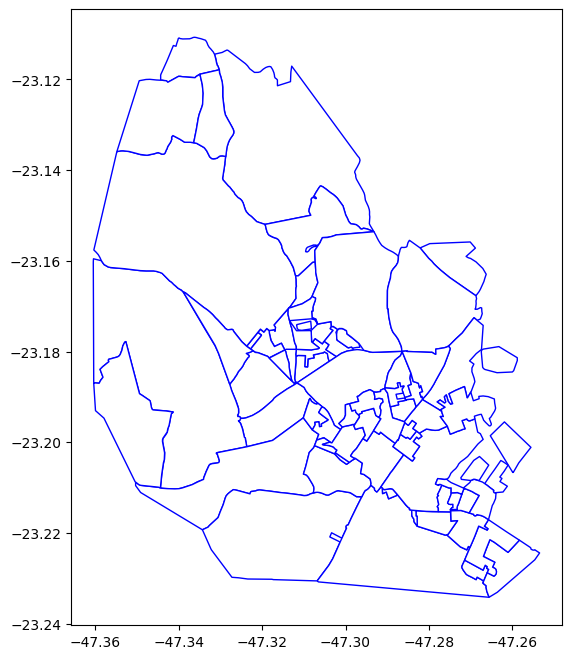

In [102]:
limites_bairros.plot(figsize=(8,8), facecolor='white', edgecolor='blue')

### Contagem dos relatos de violência por bairro

In [99]:
#Somando ocorrencias iguais
violenceCount = dict(df['bairro'].value_counts().sort_index())
#Dict para dataframe
violenceCountDf = pd.DataFrame(list(ocurrencies.items()), columns=['bairro', 'violence_count'])
violenceCountGeoDf = gpd.GeoDataFrame(violenceCountDf, geometry=bairros['geometry'])

violenceCountGeoDf.to_file("../Ambiente/json/violenceCount.geojson", driver="GeoJSON")

### Choropleth

In [28]:
#Carregando os marcadores dos centros de apoio
marcadores = gpd.read_file(r'..\Ambiente\shp\cras\cras-salto.shp') 
marcadores = marcadores[['Name','geometry']]
marcadores

,Name,geometry
0,CRAS INDEPENDENCIA,POINT Z (-47.28228 -23.18683 0.00000)
1,Cras Saltense,POINT Z (-47.31459 -23.17721 0.00000)
2,CRAS Nações,POINT Z (-47.27713 -23.19463 0.00000)
3,CRAS Santa Cruz,POINT Z (-47.26689 -23.22631 0.00000)
4,Creas Salto,POINT Z (-47.29634 -23.20466 0.00000)


In [101]:
#No folium
mapa_salto=folium.Map(location=[-23.170672, -47.319936],zoom_start=13, tiles=None)

#Mapa coroplético
folium.Choropleth(
    geo_data='../Ambiente/json/violenceCount.geojson',  
    data=violenceCountDf,  
    columns=['bairro', 'violence_count'],  
    key_on='feature.properties.bairro',  
    fill_color='YlOrBr',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Violência nos bairros de Salto',
    name='Densidade dos dados'
).add_to(mapa_salto)

#Limites dos bairros
estilo = lambda x: {"color":"black",
                    "fillOpacity":0,
                    "weight": 1}
folium.GeoJson('../Ambiente/json/bairros.geojson', style_function=estilo, popup=folium.GeoJsonPopup(fields=['Name'], aliases=['Bairro']), name='Limites de Salto').add_to(mapa_salto)
#Marcadores dos centros de auxilio
for index, row in marcadores.iterrows():
    lat, lon = row['geometry'].centroid.y, row['geometry'].centroid.x
    dados = row['Name']
    folium.Marker([lat, lon], popup=dados, icon=folium.Icon(color='green')).add_to(mapa_salto)
#Background
folium.TileLayer(tiles='CartoDBPositron', name='Mapa estilo CartoDBPositron').add_to(mapa_salto)
folium.LayerControl(position='topleft').add_to(mapa_salto)
mapa_salto.save('./Resultados/mapa_salto.html')

### HeatMap
Utilizarei a Geocoding API, da Google, para obter as coordenadas por endereço;
É necessario inserir as chaves para fazer a autenticação com a API. Para isso, utilizarei um arquivo .json com as variáveis necessárias.

In [ ]:
#with open('credentials.json') as file:
#   credentials = json.load(file)

In [ ]:
df['endereco']=df['endereco'].str.strip().str.lower()

In [ ]:
df['endereco_completo'] = df['endereco'] + ' ' + df['numero'].astype(str) + ', salto'
df

In [ ]:
#Corrigindo o nome de algumas ruas
locator = Nominatim(user_agent='pesquisa_salto', timeout=10)
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df['geolocalizacao'] = df['endereco_completo'].apply(geocode)

In [ ]:
#Enderecos nos quais não foi possível obter as coordenadas
df['geolocalizacao'].isna().sum()

In [ ]:
df['latitude']= df['geolocalizacao'].apply(lambda x: x.latitude if x else None)
df['longitude']= df['geolocalizacao'].apply(lambda x: x.longitude if x else None)
df['point_geometry'] = df['geolocalizacao'].apply(lambda x: tuple(x.point) if x else None)

In [ ]:
df[df['endereco']=='rua artemisia'].shape

In [ ]:
heatMapData = df.groupby(['latitude', 'longitude']).size().reset_index(name='Count')

In [ ]:
heatMapData.sort_values(by='Count', ascending=False)

In [ ]:
heatMapData['Count'].sum()

In [ ]:
#Carregando o mapa de Salto
mapa_salto_hm=folium.Map(location=[-23.170672, -47.319936],zoom_start=13, tiles=None)
#White layer
#folium.TileLayer(tiles=branca.utilities.image_to_url([[1,1],[1,1]]), attr=" ").add_to(mapa_salto_hm)
#Mapa dos municipios -> converter em geojson
limites_bairros.to_file('bairros.geojson', driver='GeoJSON')
#Estilo
estilo = lambda x: {"color":"black",
                    "fillOpacity":0,
                    "weight": 1}
folium.GeoJson('bairros.geojson',style_function=estilo ,name='Limite dos Bairros em Salto').add_to(mapa_salto_hm)
#Esquema das cores
indices=[0, 0.3, 0.7, 1]
colormap=branca.colormap.StepColormap(['green','yellow','red'], index=indices,
                                      caption='indices')
colorDict = {0:'green', 0.3:'green', 
             0.301:'yellow', 0.7:'yellow',
             0.701:'red',
             1:'red'}
colormap.scale(0,51).add_to(mapa_salto_hm)
#Mapa de calor
HeatMap(data=heatMapData, min_opacity=50, radius=20, blur=20).add_to(mapa_salto_hm)
#Layer control
folium.TileLayer(tiles='CartoDBPositron', name='').add_to(mapa_salto_hm)
folium.LayerControl(position='topleft').add_to(mapa_salto_hm)
mapa_salto_hm.save('mapa_salto_heatmap.html')